# 학습조직 #1 

### CH5 SVM

In [1]:
import pandas as pd
import os
import numpy as np
import datetime
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 150)
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'
plt.rc('axes', unicode_minus=False)

from sklearn import preprocessing
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM

import warnings
warnings.filterwarnings("ignore")

In [2]:
print(os.path.abspath("world-happiness-report"))


/Users/jueunhye/Kesera/world-happiness-report


In [3]:
data = pd.read_csv("/Users/jueunhye/Kesera/archive/world-happiness-report.csv")

In [4]:
data.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [5]:
data.shape

(1949, 11)

In [6]:
data.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [7]:
new_col = []
for col in data.columns:
    tmp = col.replace(" ","_")
    new_col.append(tmp)
    
data.columns = new_col  #컬럼명 치환

In [8]:
data.head()

,Country_name,year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [9]:
data.Country_name.value_counts()

Mexico                       15
Philippines                  15
Lithuania                    15
Tanzania                     15
Sweden                       15
Spain                        15
Dominican Republic           15
Georgia                      15
Russia                       15
Zimbabwe                     15
United Kingdom               15
Chile                        15
Israel                       15
France                       15
Kenya                        15
Japan                        15
Moldova                      15
Egypt                        15
Tajikistan                   15
Venezuela                    15
China                        15
Cameroon                     15
United States                15
Cambodia                     15
Ukraine                      15
Denmark                      15
South Africa                 15
Germany                      15
Italy                        15
Jordan                       15
Bangladesh                   15
South Ko

In [10]:
chart_cols = data.columns[(~data.columns.str.contains("Country_name")) & (~data.columns.str.contains("year"))]

In [11]:
chart_cols

Index(['Life_Ladder', 'Log_GDP_per_capita', 'Social_support',
       'Healthy_life_expectancy_at_birth', 'Freedom_to_make_life_choices',
       'Generosity', 'Perceptions_of_corruption', 'Positive_affect',
       'Negative_affect'],
      dtype='object')

In [12]:
data.isna().sum()

Country_name                          0
year                                  0
Life_Ladder                           0
Log_GDP_per_capita                   36
Social_support                       13
Healthy_life_expectancy_at_birth     55
Freedom_to_make_life_choices         32
Generosity                           89
Perceptions_of_corruption           110
Positive_affect                      22
Negative_affect                      16
dtype: int64

In [13]:
data = data.fillna(0)

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


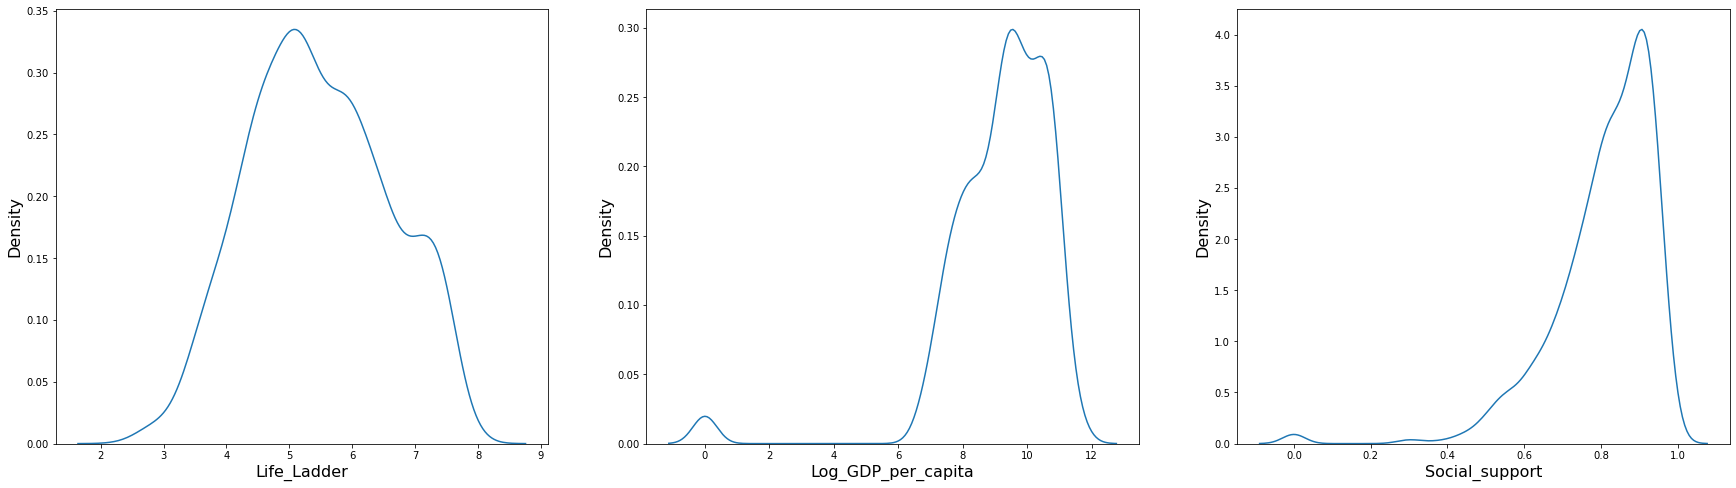

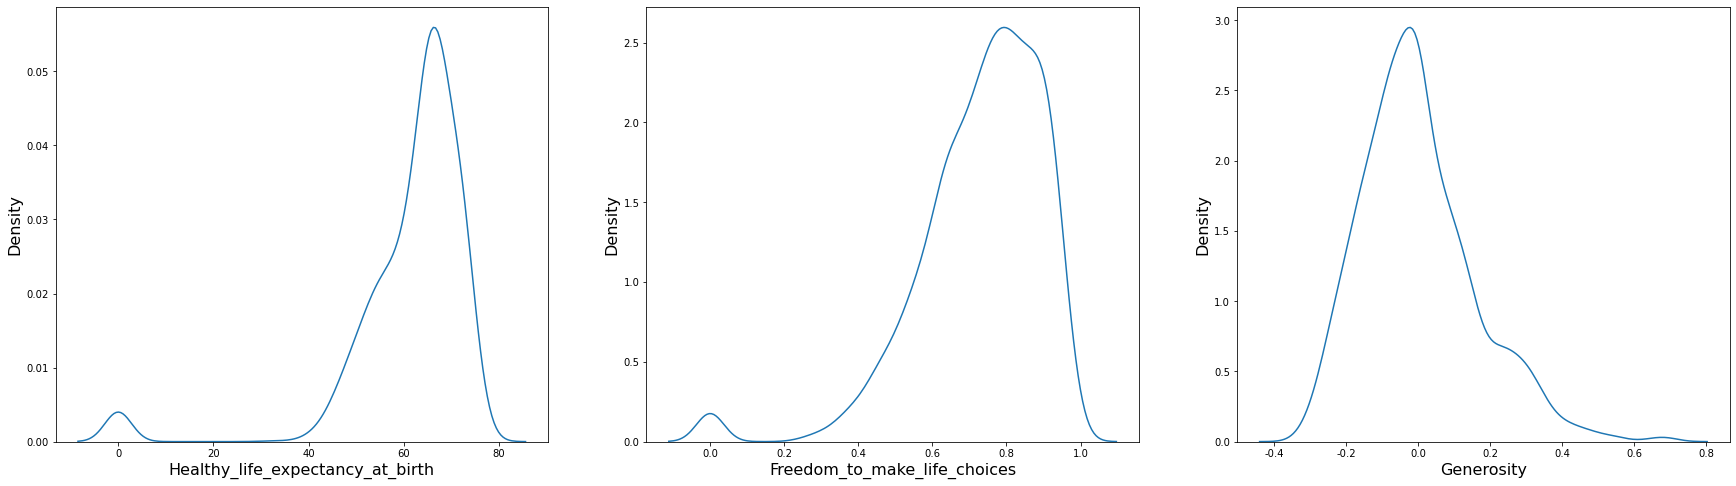

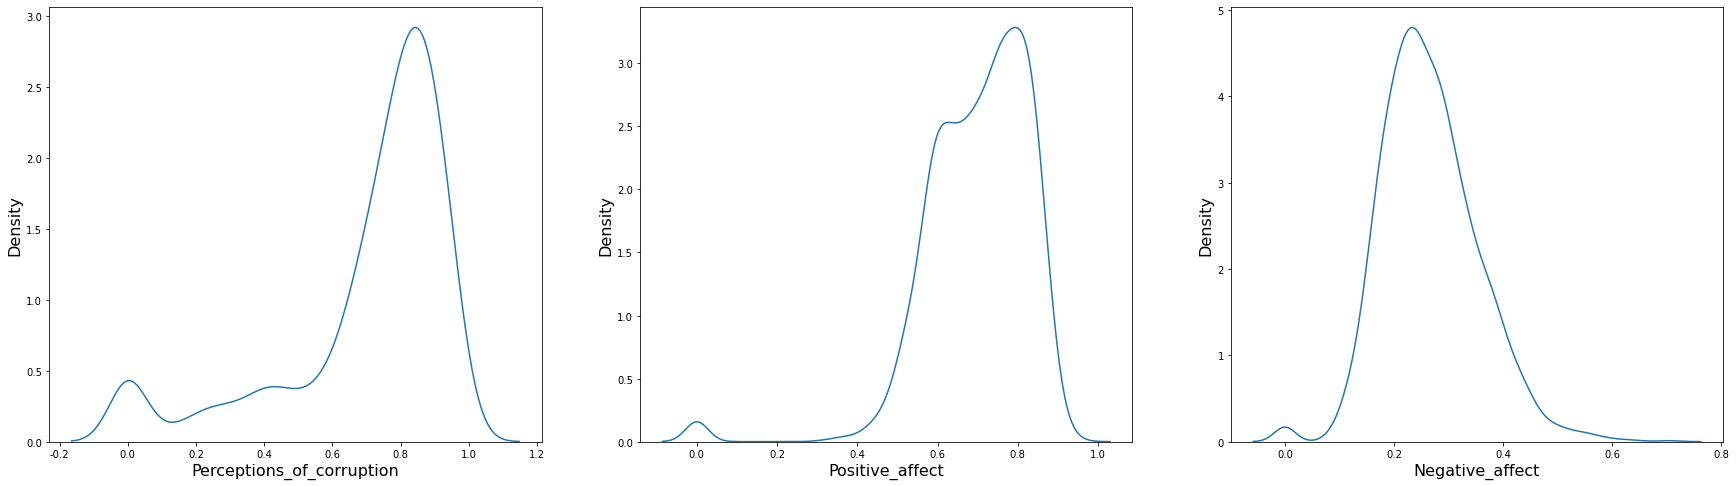

In [14]:
plt.rcParams['axes.labelsize'] = 16  # x,y축 사이즈
plt.rcParams['axes.titlesize'] = 16  #제목 사이즈
plt.rcParams['legend.fontsize'] = 16 #범례 사이즈


colnum = 0
rownum = 0 
fig, axs = plt.subplots(ncols=3, figsize = (30,8))
zero_cols = []

for col in chart_cols:
    
    if data[col].sum() == 0:
        zero_cols.append(col)
        continue

    if colnum > 2 :
        colnum = 0
        fig, axs = plt.subplots(ncols=3, figsize = (30,8))
        rownum += 1
    

    sns.distplot(data[col], kde = True, hist = False, ax = axs[colnum])
         
#     plt.legend()
    
    colnum +=1

In [15]:
x_var = chart_cols[~chart_cols.str.contains("Log_GDP_per_capita")]

In [16]:
# X = preprocessing.StandardScaler().fit(data[x_var])
X = data[x_var]
y = data["Log_GDP_per_capita"]

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
X.describe()

,Life_Ladder,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
count,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000
mean,5.466705,0.807132,61.571398,0.730366,0.000099,0.704958,0.701989,0.266340
std,1.115711,0.135355,12.843519,0.169611,0.158466,0.250322,0.130268,0.088213
min,2.375000,0.000000,0.000000,0.000000,-0.335000,0.000000,0.000000,0.000000
25%,4.640000,0.747000,57.500000,0.642000,-0.106000,0.654000,0.622000,0.206000
50%,5.386000,0.834000,65.000000,0.759000,-0.016000,0.793000,0.718000,0.257000
75%,6.283000,0.905000,68.400000,0.854000,0.085000,0.868000,0.798000,0.319000
max,8.019000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


In [19]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import GridSearchCV

k=['rbf','sigmoid']
c= range(1,10)
g=np.arange(1e-4,1e-2,0.001)
g=g.tolist()
param_grid=dict(kernel=k, C=c, gamma=g)
print(param_grid)
svr=SVR()

grid = GridSearchCV(svr, param_grid, cv=5, scoring='accuracy',n_jobs = -1)
grid.fit(X_train, y_train)  
print()
print("Best parameters set found on development set:")
print()
print(grid.best_params_)




{'kernel': ['rbf', 'sigmoid'], 'C': range(1, 10), 'gamma': [0.0001, 0.0011, 0.0021, 0.0031, 0.0041, 0.0051, 0.0061, 0.0071, 0.0081, 0.0091]}

Best parameters set found on development set:

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}


## 차원축소

### PCA

In [20]:
data.head()

,Country_name,year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [21]:
X = pd.DataFrame(preprocessing.StandardScaler().fit_transform(data[x_var])) ##스케일링 진행

In [22]:
X.head()

,0,1,2,3,4,5,6,7
0,-1.562370,-2.631776,-0.838879,-0.072926,1.059812,0.707438,-1.412748,-0.094565
1,-0.954530,-1.885398,-0.807727,-0.302923,1.198678,0.579570,-0.905970,-0.332687
2,-0.635369,-1.981466,-0.776575,-0.768815,0.763143,0.008160,-0.644903,0.098201
3,-1.465546,-2.114484,-0.751653,-1.382142,1.021939,0.104061,-0.698652,0.007488
4,-1.509475,-2.114484,-0.726732,-1.175734,1.489035,0.283875,0.061514,0.018827


In [23]:
###7 변수 -> 2개 변수 
pca = PCA(n_components = 2, random_state = 123)
X_pca = pd.DataFrame(pca.fit_transform(X))


In [24]:
##latent factor 확인## 
pca_compo = pd.DataFrame({'var_nm' : data[x_var].columns, 'pca0' : pca.components_[0], 'pca1' : pca.components_[1], 'pca0a' : abs(pca.components_[0]), 'pca1a' : abs(pca.components_[1])})
print(pca_compo.sort_values('pca0a', ascending=False).iloc[:3,:5])
print(pca_compo.sort_values('pca1a', ascending=False).iloc[:3,:5])

            var_nm      pca0      pca1     pca0a     pca1a
0      Life_Ladder -0.485518 -0.179722  0.485518  0.179722
1   Social_support -0.430676 -0.278461  0.430676  0.278461
6  Positive_affect -0.421138  0.139789  0.421138  0.139789
                             var_nm      pca0      pca1     pca0a     pca1a
4                        Generosity -0.214194  0.670497  0.214194  0.670497
2  Healthy_life_expectancy_at_birth -0.267286 -0.566804  0.267286  0.566804
1                    Social_support -0.430676 -0.278461  0.430676  0.278461


<AxesSubplot:xlabel='0', ylabel='1'>

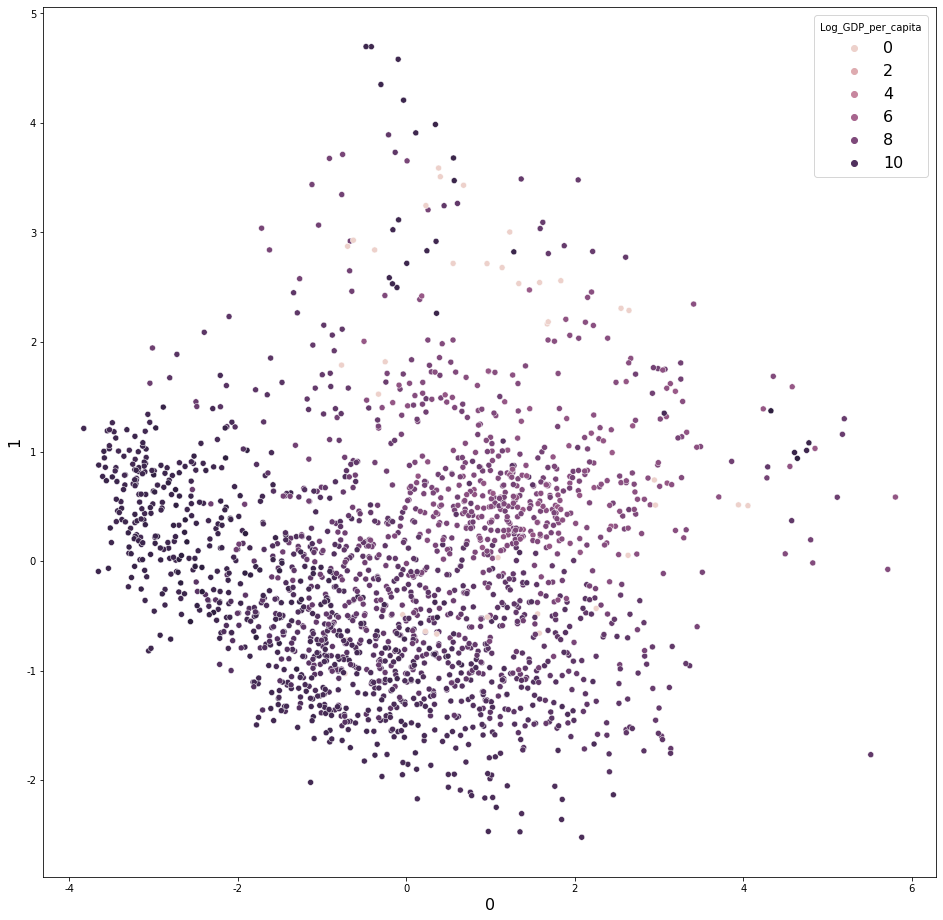

In [25]:
##pc1과 pc2로 표현한 scatter plot 
fig, axs = plt.subplots(ncols=1, figsize=(16,16))
sns.scatterplot(X_pca.iloc[:,0], X_pca.iloc[:,1] ,hue = data["Log_GDP_per_capita"])

### TSNE

In [26]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, random_state = 123)
X_tsne = pd.DataFrame(tsne.fit_transform(X))

<AxesSubplot:xlabel='0', ylabel='1'>

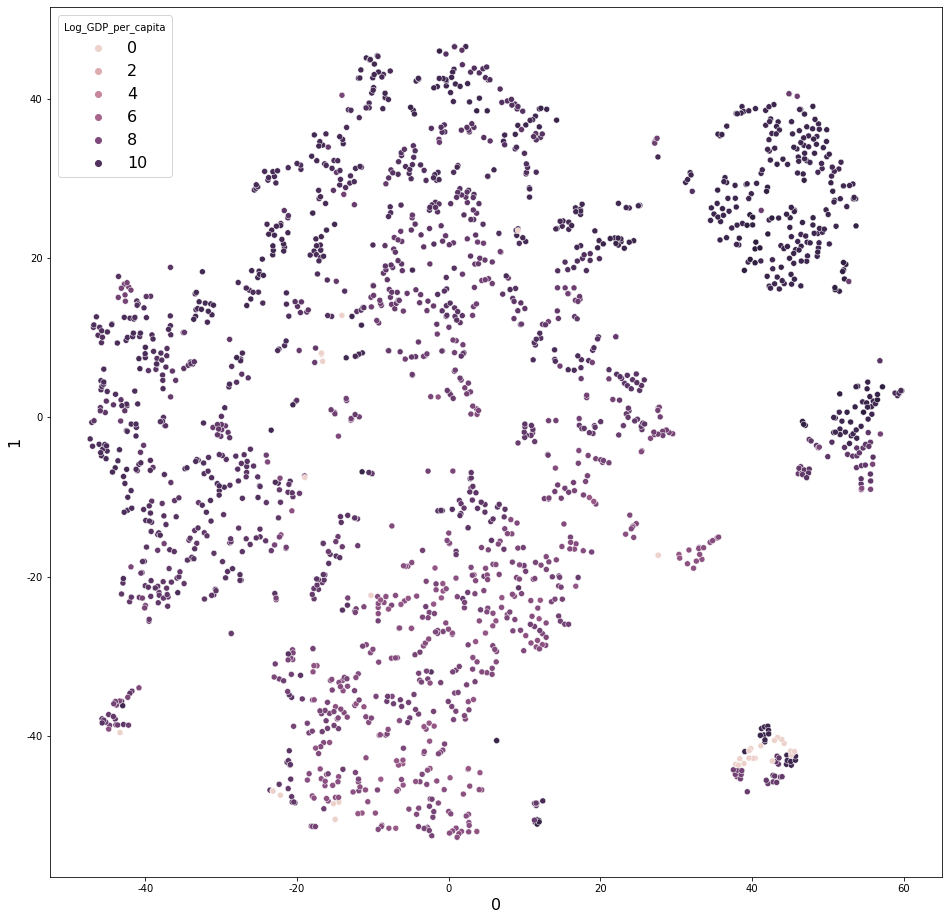

In [27]:
##tsne로 표현한 scatter plot
fig, axs = plt.subplots(ncols=1, figsize=(16,16))
sns.scatterplot(X_tsne.iloc[:,0], X_tsne.iloc[:,1] ,hue = data["Log_GDP_per_capita"])

### Umap

In [28]:
import umap.umap_ as umap

In [29]:
# X_umap = umap.UMAP(n_neighbors=3, min_dist=0.0,
#                               n_components=2, random_state=123).fit_transform(X) 

X_umap = umap.UMAP(n_neighbors = 4, min_dist =0.0,n_components = 2, random_state=123).fit_transform(data[x_var]) ##스케일링 미진행 
X_umap = pd.DataFrame(X_umap)

<AxesSubplot:xlabel='0', ylabel='1'>

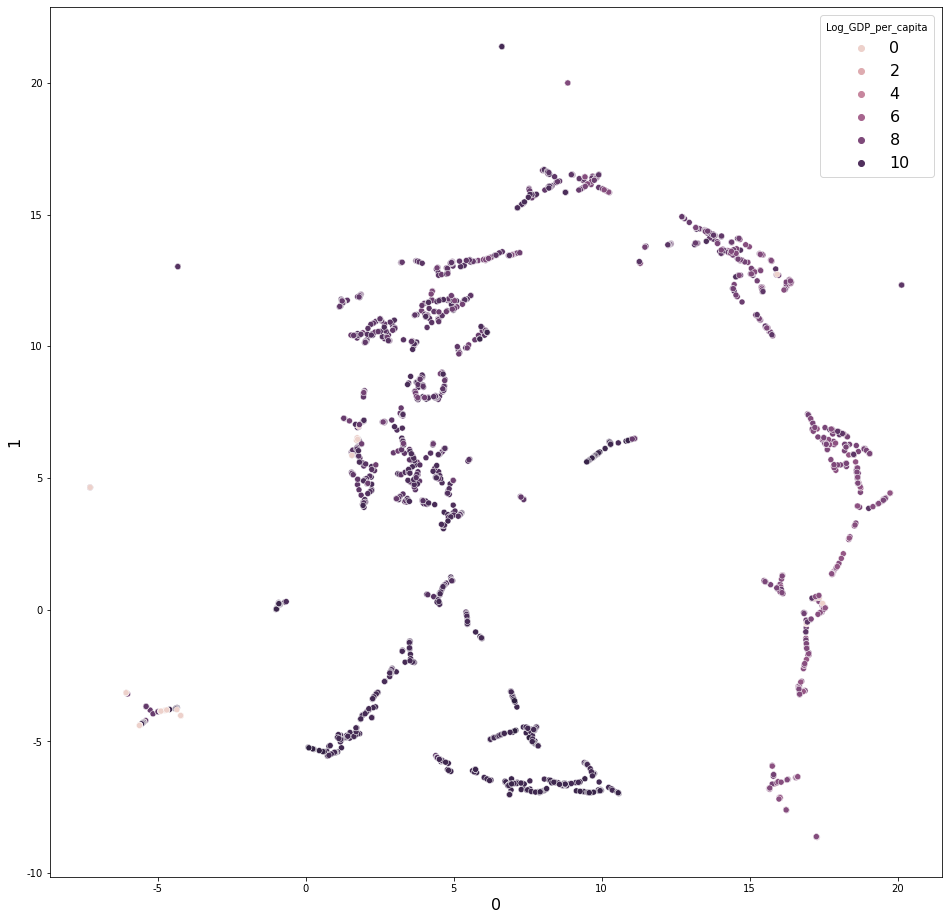

In [30]:
##umap으로 표현한 scatter plot
fig, axs = plt.subplots(ncols=1, figsize=(16,16))
sns.scatterplot(X_umap.iloc[:,0], X_umap.iloc[:,1] ,hue = data["Log_GDP_per_capita"])

### CH9, 비지도학습

In [31]:
##비지도 학습용 데이터셋
df = pd.read_csv("/Users/jueunhye/Kesera/archive/ambient_temperature_system_failure.csv") ##케글에서 데이터 다운받음.

In [32]:
df.head()

,timestamp,value
0,2013-07-04 00:00:00,69.880835
1,2013-07-04 01:00:00,71.220227
2,2013-07-04 02:00:00,70.877805
3,2013-07-04 03:00:00,68.959400
4,2013-07-04 04:00:00,69.283551


In [33]:
## 데이터 전처리 진행

# change the type of timestamp column for plotting
df['timestamp'] = pd.to_datetime(df['timestamp'])
# change fahrenheit to °C (temperature mean= 71 -> fahrenheit)
df['value'] = (df['value'] - 32) * 5/9

# the hours and if it's night or day (7:00-22:00)
df['hours'] = df['timestamp'].dt.hour
df['daylight'] = ((df['hours'] >= 7) & (df['hours'] <= 22)).astype(int)

# the day of the week (Monday=0, Sunday=6) and if it's a week end day or week day.
df['DayOfTheWeek'] = df['timestamp'].dt.dayofweek
df['WeekDay'] = (df['DayOfTheWeek'] < 5).astype(int)

# time with int to plot easily
df['time_epoch'] = (df['timestamp'].astype(np.int64)/100000000000).astype(np.int64)



In [39]:
df.head()

,timestamp,value,hours,daylight,DayOfTheWeek,WeekDay,time_epoch
0,2013-07-04 00:00:00,21.044908,0,0,3,1,13728960
1,2013-07-04 01:00:00,21.789015,1,0,3,1,13728996
2,2013-07-04 02:00:00,21.598781,2,0,3,1,13729032
3,2013-07-04 03:00:00,20.533000,3,0,3,1,13729068
4,2013-07-04 04:00:00,20.713084,4,0,3,1,13729104


In [36]:
# Take useful feature and standardize them
data = df[['value', 'hours', 'daylight', 'DayOfTheWeek', 'WeekDay']]
data = preprocessing.StandardScaler().fit_transform(data)
data = pd.DataFrame(data)

In [37]:
data.head()

,0,1,2,3,4
0,-0.320586,-1.661537,-1.414798,0.005769,0.62132
1,-0.005228,-1.517172,-1.414798,0.005769,0.62132
2,-0.085851,-1.372807,-1.414798,0.005769,0.62132
3,-0.537536,-1.228442,-1.414798,0.005769,0.62132
4,-0.461215,-1.084077,-1.414798,0.005769,0.62132


In [38]:
data.shape

(7267, 5)

### DBSCAN/HDBSCAN

In [41]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(data)
pd.DataFrame(db.labels_).value_counts()  ## -1이라고 표시 된 것이 outlier임 

 3     700
 1     699
 17    692
 14    677
 6     662
 11    657
 8     629
-1     330
 2     308
 0     306
 16    303
 5     294
 13    286
 7     281
 10    137
 23    120
 4      30
 19     29
 20     22
 21     22
 15     16
 12     15
 18     14
 22     14
 24     13
 9      11
dtype: int64

In [51]:
import hdbscan

outliers_fraction = 0.01
hdbscan = hdbscan.HDBSCAN(min_cluster_size=5)
hdbscan.fit(data)

threshold = pd.Series(hdbscan.outlier_scores_).quantile(1-outliers_fraction)#상위1%를 아웃라이어로 지정
outliers = np.where(hdbscan.outlier_scores_ > threshold,1,0)

In [53]:
pd.DataFrame(outliers).value_counts() ##1이 이상, 0이 정상 데이터

0    7194
1      73
dtype: int64

### GMM

In [54]:
from sklearn.mixture import GaussianMixture

In [56]:
##bic 를 기준으로 군집의 개수를 선정함

n_clusters=np.arange(2, 8)
bics=[]
bics_err=[]
iterations=10

for n in n_clusters:
    tmp_bic=[]
    
    gmm=GaussianMixture(n, n_init=2).fit(data) 
    tmp_bic.append(gmm.bic(data))
    
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/2)))
    err=np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)

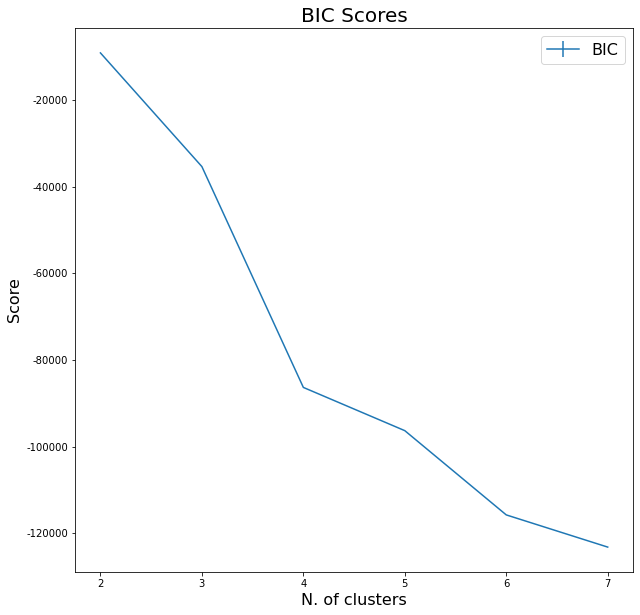

In [57]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.errorbar(n_clusters, bics, yerr=bics_err, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.legend()

In [58]:
gmm = GaussianMixture(n_components = 4, random_state = 123).fit(data) 
cluster_labels = gmm.predict(data)
cluster_labels_proba = gmm.predict_proba(data)

In [61]:
cluster_labels_proba = pd.DataFrame(cluster_labels_proba)
cluster_labels_proba["cluster"] = cluster_labels

In [71]:
data["cluster"] = cluster_labels

In [64]:
cluster_labels_proba.head()

,cluster0_pro,cluster1_pro,cluster2_pro,cluster3_pro,cluster
0,1.0,5.374138e-12,0.0,0.0,0
1,1.0,5.827559e-12,0.0,0.0,0
2,1.0,1.390591e-11,0.0,0.0,0
3,1.0,5.527140e-11,0.0,0.0,0
4,1.0,1.550500e-10,0.0,0.0,0


In [63]:
column_list = []
for i in range(0,len(cluster_labels_proba.columns)-1):
    column_list.append("cluster" + str(i) + "_pro")

column_list.append("cluster")
cluster_labels_proba.columns = column_list   ##컬럼명 지정

In [68]:
####이상치 threshold를 선정
outlier = round(outliers_fraction*len(data)) #데이터의 1%를 아웃라이어로 지정
priint(outlier)

In [70]:
cluster_ratio_set = []
num_cluster = 4 #군집 개수 지정
for cluster in range(num_cluster+1):
    cluster_ratio_set += cluster_labels_proba[cluster_labels_proba.cluster == cluster].iloc[:,cluster].tolist()
    
cluster_ratio_set.sort()
ratio_threshold = cluster_ratio_set[outlier-1]
ratio_threshold

0.9999999978218632

In [72]:
output = pd.DataFrame()
num_cluster = 4 # 군집 개수
for cluster in range(num_cluster+1):
    tmp = data[data.cluster==cluster]
    tmp["anomaly_gmm"] = np.where(cluster_labels_proba[cluster_labels_proba.cluster==cluster].iloc[:,cluster] <= ratio_threshold, 1,0)
    tmp["proba_gmm"] = cluster_labels_proba[cluster_labels_proba.cluster==cluster].iloc[:,cluster]
    output = pd.concat([output,tmp])

In [73]:
output.head()

,0,1,2,3,4,cluster,anomaly_gmm,proba_gmm
0,-0.320586,-1.661537,-1.414798,0.005769,0.62132,0,0,1.0
1,-0.005228,-1.517172,-1.414798,0.005769,0.62132,0,0,1.0
2,-0.085851,-1.372807,-1.414798,0.005769,0.62132,0,0,1.0
3,-0.537536,-1.228442,-1.414798,0.005769,0.62132,0,0,1.0
4,-0.461215,-1.084077,-1.414798,0.005769,0.62132,0,0,1.0


In [74]:
output.anomaly_gmm.value_counts() ## 해당 1 값을 아웃라이어라고 지정하거나, 

0    7194
1      73
Name: anomaly_gmm, dtype: int64

In [75]:
output.cluster.value_counts() ## 각 군집의 특성을 파악하여 특정 군집을 이상으로 지정하거나? 

1    3721
0    1522
2    1428
3     596
Name: cluster, dtype: int64